# 12. 강화학습

## 12.1 강화 학습(reinforcement learning)이란
- 강화 학습은 머신 러닝/딥러닝의 한 종류로, 어떤 환경에서 어떤 행동을 했을 때 그것이 잘된 행동인지 잘못된 행동인지를 판단하고 보상(또는 벌칙)을 주는 과정을 반복해서 스스로 학습하게 하는 분야다.
- 이때 어떤 환경에서 어떤 행동을 하는지 알기 위해'환경(environment)'과 '에이전트(agent)'라는 구성 요소를 사용한다.
  - 환경: 에이전트가 다양한 행동을 해 보고, 그에 따른 결과를 관측할 수 있는 시뮬레이터
  - 에이전트: 환경에서 행동하는 주체
- 강화 학습의 목표는 환경과 상호작용하는 에이전트를 학습시키는 것
- 에이전트는 상태(state)라고 하는 다양한 상황 안에서 행동(action)을 취하며, 조금씩 학습해 나간다. 에이전트가 취한 행동은 그에 대한 보상으로 양(+)이나 음(=) 또는 0을 받는다.
- 강화 학습의 문제들은 마르코프 결정 과정으로 표현하고, 이 마르코프 결정 과정은 모두 마르코프 프로세스에 기반한다.

## 12.2 마르코프 결정 과정
강화 학습은 마르코프 결정 과정에 학습 개념을 추가한 것으로 볼 수 있다


### 12.2.1 마르코프 프로세스
- 마르코프 프로세스(Markov Process, MP)는 어떤 상태가 일정한 간격으로 변하고, 다음 상태는 현재 상태에만 의존하는 확률적 상태 변화를 의미한다. 즉, 현재 상태에 대해서만 다음 상태가 결정되며, 현재 상태까지의 과정은 전혀 고려하지 않는다.

- 이렇게 변화 상태들이 체인처럼 엮여 있다고 하여 **마르코프 체인(Markov Chain)**이라고도 한다.

- 또 다른 마르코프 프로세스의 정의로 '마르코프 특성(Markov Property)을 지니는 이산 시간(discrete time)에 대한 확률 과정(stochastic process)'이 있다. 과거와 현재 상태 모두를 고려했을 때, 미래 상태가 나타날 확률과 현재 상태만 고려했을 때 미래 상태가 발생할 확률은 동일하다(P(S_(t+1) | S_t) = P(S_(t+1) | S_1, ... ,S_t))

- 마르코프 체인은 시간에 따른 상태 변화를 나타내고 이때 상태 변화를 **전이(transition)**이라 한다.
- 전이는 확률로 표현되는데, 이를 **상태 전이 확률(state transition probability)**이라 한다. 시간 t에서의 상태를 s라고 하고, 시간 t+1 에서의 상태를 s'이라고 할 때 상태 전이 확률은 P(S_(t+1) = s' | S_t = s)가 된다.
- 이러한 상태 전이 확률을 행렬로 변경한다면 **상태 전이 확률 행렬(state transition probability matrix)**이라고 한다.
- 주의할 사항으로 '현재 상태가 바로 이전의 상태로 결정된다'는 말이 현재 상태가 A일 때 다음 상태는 A가 유일하게 결정하는, 다른 경우는 있을 수 없는 것이 아니다.
- 다음 상태에 영향을 미치는 것은 과거에 여러 상태가 아닌 지금 현재 상태뿐이고 지금 현재 상태에서 다음 상태를 결정할 때는 여러 가지 확률 변수가 개입한다.

### 12.2.2 마르코프 보상 프로세스
마르코프 보상 프로세스(Markov Reward Process, MRP)는 마르코프 프로세스에서 각 상태마다 좋고 나쁨(reward)를 추가한 확률 모델이다.
- 각 상태의 보상 총합을 리턴(return)이라 한다.

상태의 정확한 가치를 구하기 위해서는 어느 시점에서 보상을 받을지가 중요하다. 즉, '특정 상태에 빨리 도달해서 즉시 보상을 받을 것인지? 아니면 나중에 도달해서 보상을 받을 것인지'에 대한 가치 판단이 필요하다. 

그래서 **할인율(discounting factor, γ)**이 등장한다. 보통 γ는 0 ~ 1 사이의 값으로 하여 미래 가치를 현재 시점에서의 가치로 변환한다. 미래에 받게 될 보상들이 모두 0이 되면, 바로 다음의 보상만 추구하는 근시안적인 행동을 하게 되고, 반대로 할인율이 1과 가까워질수록 미래 보상에 대한 할인이 적어지기 때문에 미래 보상들을 더 많이 고려하게 되는 원시안적인 행동을 하게 된다.

추가적으로 **가치 함수(value function)**도 등장한다. 현재 상태가 s일 때 앞으로 발생할 것으로 기대되는(E) 모든 보상의 합을 가치(value)라고 한다. v(s) = E[G_t | S_t = s](G_t는 할인율이 적용된 return을 의미) 로 표현할 수 있다. 즉, 가치 함수는 현재 시점에서 마래의 모든 기대되는 보상을 표현하는 미래 가치라고 할 수 있다.

**즉, 강화 학습의 핵심은 가치 함수를 최대한 정확하게 찾는 것이다. 미래 가치가 가장 클 것으로 기대되는 결정을 하고 행동하는 것이 강화 학습의 목표**



### 12.2.3 마르코프 결정 과정
마르코프 결정 과정(Markov Decision Process, MDP)은 기존 마르코프 보상 과정에서 행동이 추가된 확률 모델. MDP 목표는 정의된 문제에 대해 각 상태마다 전체적인 보상을 최대화하는 행동이 무엇인지 결정하는 것

- 각각의 상태마다 행동 분포(행동이 선택될 확률)를 표현하는 함수를 정책(policy, π)이라고 하며, π는 주어진 상태 s에 대한 행동 분포를 표현함
- π(a | s) = P(A_t = a | S_t = s)
- 주어진 π를 따를 때 s에서 s'으로 이동할 확률 P = Σ_(a∈A)π(a | s)P_ss' 으로 표현가능
- s에서 얻을 수 있는 보상(R) = Σ_(a∈A)π(a | s)R_s 으로 표현 가능
- MDP에서 가치 함수는 에이전트가 놓인 상태 가치를 함수로 표현한 상태-가치함수(state-value function)와 상태와 행동에 대한 가치를 함수로 표현한 행동-가치함수(action-value function)가 있다.

#### 상태-가치 함수
- MDP에서 상태-가치 함수(v_π(s))는 MDP의 가치 함수와 마찬가지로 상태 s에서 얻을 수 있는 return의 기댓값을 의미
- MRP와 차이는 주어진 정책에 따라 행동을 결정하고 다음 상태로 이동하기 때문에 MDP에서 상태-가치 함수는 v_π(s) = E_π[G_t | s_t = s] 로 표현
- 여기서 중요한 점은 현재 시점에서 상태-가치 함수가 바로 다음 시점의 상태-가치 함수로 표현된다는 점

#### 행동-가치 함수
- 행동-가치 함수(q_π(s, a))는 상태 s에서 a라는 행동을 취했을 때 얻을 수 있는 리턴의 기댓값을 의미
- q_π(s, a) = E_π[G_t | S_t = s, A_t = a]
- 가치 함수(상태가치, 행동가치)를 계산하는 방법은 O(n^3) 시간 복잡도가 필요하기 때문에 상태 수가 많아지면 적용하기 어렵다. 그래서 네 가지 방법론이 등장
  1. 다이나믹 프로그래밍(dynamic programmin): .마르코프 결정 과정의 상태와 행동이 많지 않고 모든 상태와 전이 확률을 알고 있다면 다이나믹 프로그래밍 방식으로 각 상태의 가치와 최적의 행동을 찾을 수 있지만, 대부분의 강화 학습 문제는 상태도 많고, 상태가 전이되는 경우의 수도 많아 적용하기 어렵다.
  2. 몬테카를로(Monte Carlo method): 몬테카를로는 전체 상태 중 일부 구간만 방문해 근사적으로 가치를 추정한다. 초기 상태에서 시작해 중간 상태들을 경유해 최종(terminal)상태까지 간 후 최종 보상을 측정하고 방문했던 상태들의 가치를 업데이트한다.
  3. 시간 차 학습(temporal difference learning): 최종 상태에 도달하기 전에 방문한 상태의 가치를 즉시 업데이트한다. 이는 다이나믹 프로그래밍과 몬테카를로의 중간적인 특성을 가진다
  4. 함수적 접근 학습(function approximation learning): 마르코프 결정 과정의 상태가 아주 많거나, 상태가 연속적인 값을 갖는 경우 상태-가치 함수나 행동-가치 함수를 테이블 형태로 학습하기 어렵다. 함수적 접근 학습 방법은 연속적인 상태를 학습하고자 상태와 관련된 특성 벡터를 도입해 특성의 가중치를 업데이트하여 가치의 근사치를 찾을 수 있다.




## 12.3 MDP를 위한 벨만 방정식
벨만 방정식(Bellman equation)은 상태-가치 함수와 행동-가치 함수의 관계를 나타내는 방정식이며 벨만 기대 방정식과 벨만 최적 방정식이 존재한다.

### 12.3.1 벨만 기대 방정식
가치 함수 v_π(s)는 단순히 어떤 상황에서 미래의 보상을 포함한 가치를 나타낸다. 다음 상태로 이동하기 위해서는 어떤 정책(policy)에 따라 행동해야 하는데, 이때 정책을 고려한 다음 상태로의 이동을 **벨만 기대 방정식(Bellman expectation equation)**이라 한다.

MDP의 상태-가치 함수를 보면 v_t(s) = E+π[G_t | S_t = s]인데 이를 전개시켜 다시 풀어보면 v_π(s) = E_π[R_(t+1) + γv_π(S_(t+1)) | S_t = s] 가 된다.

즉 이 식을 통해 우리가 알 수 있는 것은 **"현재 시점의 가치는 현재의 보상과 다음 시점의 가치로 표현할 수 있다"**는 것이다. 즉, 재귀적인 형태로서 미래의 가치들이 현재의 가치에 영향을 주고 있는 형태다.

#### 상태-가치 함수
MDP의 상태-가치 함수를 다시보면 v_π(s) = E_π[R_(t+1) + γv_π(S_(t+1)) | S_t = s]이다. 여기서 먼저 기댓값을 풀어서 이야가히면, 기댓값은 현재 상태에서 정책에 따라 행동을 했을 때 얻을 수 있는 각각의 행동(π(a | s))과 그 행동이 발생할 확률(p(s', r| s, a))을 곱한 것이다. 즉, 현재 기대되는 결과에 그 결과가 일어날 확률로 가중치가 곱해진 것과 같다.

γG_(t+1)은 더 미래에 일어날 보상에 할인율이 곱해진 것이다. 이를  또다시 기댓값으로 풀어 쓴다면 '미래에 일어날 모든 일의 평균치'와 같은 의미로 사용할 수 있다. 이를 통해 식을 완전히 정리한다면

Σ_(a∈A)π(a | s)Σ_(s',r)P(s', r | s, a)[r + γv_π(s')]
=> Σ_(a∈A)q_π(s, a)

가 된다. 위 두식을 상태-가치 함수의 벨만 방정식이라 한다.

상태 s에서 행동 a를 했을 때의 행동에 대한 가치는 보상과 그다음 상태의 가치함수다. 이 중 다음 상태-가치 함수는  t+1 시점에서의 가치 함수이므로 할인율과 현재 상태 s에서 다음 상태s'로 전이될 확률도 적용해 주어야 한다.
즉 q_π(s, a) = R_(s)^a + γΣ_(s'∈S)P_(ss')^a,v_π(s')) 이다.

#### 행동-가치 함수
행동-가치 함수를 먼저 정리하겠습니다.

q_π(s, a) = E_π[R_(t+1) + γE(G_(t+1) | S_(t+1) = s', A_(t+1) = a') | S_t = s, A_t = a]

또한

R_(s)^a = E_π[R_(t+1)|S_t = s, A_t = a]

P_(ss')^a = P(s' | s, a) = P[S_(t+1) == s' | S_t = s, A_t = a]

이제 q_π(s, a) = R_(s)^a + γΣP_(ss')^a v_π(s')가 되고 v_π를 활용해 한번 더 식을 정리하면

q_π(s, a) = R_(s)^a + γΣP_(ss')^aΣπ(a'|s')q_π(s',a') 이 된다.

최종적으로 상태-가치 함수와 행동-가치 함수를 사용해 현재와 바로 다음 상태, 그리고 행동 간 관계가 드러나도록 수식을 정리할 수 있게 된다.

상태-가치 함수는 뒤따를 행동-가치 함수의 정책 기반 가중 평균으로 이해할 수 있고, 행동-가치 함수는 다음 상태-가치 함수에 대한 보상과 상태 전이 확률에 대한 결합 확률의 가중 평균으로 볼 수 있다.

이를 이용해 강화 학습 과정을 살펴보면
1. 처음 에이전트가 접하는 상태 s나 행동 a는 임의의 값으로 설정한다.
2. 환경과 상호 작용하면서 얻은 보상과 상태에 대한 정보들을 이요하여 어떤 상태에서 어떤 행동을 취하는 것이 좋은지 판단한다.
3. 이때 최적의 행동을 판단하는 수단이 상태-가치 함수와 행동-가치 함수이고, 이것을 벨만 기대 방정식을 이용해 업데이트하면서 점점 높은 보상을 얻을 수 있는 상태와 행동을 학습한다.



### 12.3.2 벨만 최적 방정식
강화 학습에서 추구하고자 하는 목표는 최적의 가치 함수 값을 찾는 것이 아닌 **최대의 보상을 얻는 정책을 찾는 것**이다. 강화 학습에서 어떤 목표를 이루었을 때를 '최적(optimal)'의 상태, 즉 어떤 목적이 달성된 상태라 하고 강화 학습 목표에 따라 찾은 정책을 **최적화된 정책(optimal policy)**이라고 하고, 이를 따르는 벨만 방정식을 **벨만 최적 방정식(Bellman optimality equation)**이라고 한다.

#### 최적의 가치 함수(optimal value function)
- 최대의 보상을 갖는 가치 함수
- 상태-가치 함수는 어떤 상태가 더 많은 보상을 받을 수 있는지 알려주고, 행동-가치 함수는 어떤 상태에서 어떤 행동을 취해야 더 많은 보상을 받을 수 있는지 알려준다.
- 즉, 모든 상태에 대해 상태-가치 함수를 계산할 수 있다면, 모든 상태에 대해 최적의 행동을 선택 가능

  #### 최적의 상태-가치 함수(optimal state-value function)
  - 주어진 모든 정책에 대한 상태-가치 함수의 최댓값
  - v(s) = max(v_π(s))

  #### 최적의 행동-가치 함수(optimal action-value function)
  - 주어진 모든 정책에 대해 행동-가치 함수의 최댓값
  - q(s, a) = max(q_π(s, a))
  - 행동-가치 함수에 대한 최적의 가치 함수를 구할 수 있다면 주어진 상태에서 q값이 가장 높은 행동을 선택할 수 있게 되고, 최적화된 정책을 구할 수 있게 된다.


### 12.3.3 다이나믹 프로그래밍
- 다이나믹 프로그래밍(dynamic programming)은 연속적으로 발생되는 문제를 수학적으로 최적화하여 풀어내는 것
- MDP의 모든 상황에 대한 것을 이미 알고 있다고 가정하기 때문에 계획이 가능. 즉, 어떤 행동을 취했을 때 어떤 상태가 되는지 미리 알고 있기에 계획이 가능하다는 것과 동일
- MDP와 정책을 input으로 하여 가치 함수를 찾아내는 것이 예측(prediction)과정
- MDP를 input으로 하여 기존 가치 함수를 더욱 최적화하는 것이 컨트롤(control)과정
- 최종적으로 정책은 가치 함수를 사용해 최적화된 정책을 찾을 수 있다.

#### 정책 이터레이션(policy iteration)
- 정책을 더 좋게 업데이트하기 위해 평가와 발전이라는 두 가지 접근 방식이 존재
- 현재 정책을 이용해 가치 함수를 찾는 것이 평가(evaluate)
- 가치 값과 행동에 대한 가치 값을 비교해 더 좋은 정책을 찾는 과정이 발전(improve)
- 평가와 발전을 반복하여 수행하면 정책과 가치는 특정 값으로 수렴하고, 그때가 최적화된 정책과 가치

  #### 정책 평가(policy evaluation)
  - 모든 상태에 대해 그다음 상태가 될 수 있는 행동에 대한 보상의 합을 저장하는 것
  - 주변 상태의 가치 함수와 바로 다음 상태에서 얻어지는 보상만 고려해서 현재 상태의 다음 가치 함수를 계산하는 것
  - 무한히 반복하다 보면 어떤 값에 수렴하게 되고, 그 수렴된 값을 실제 가치 함수 값으로 유추할 수 있음

  #### 정책 발전(policy improvement)
  - 정책 발전으로 가장 많이 알려진 방법이 욕심쟁이 정책 발전(greedy policy improvement)가 있음
  - 에이전트가 할 수 있는 행동들의 행동-가치 함수를 비교하고 가장 큰 함수 값을 가진 행동을 취하는 것
  - 이전 가치 함수에 비해 업데이트된 정책으로 움직였을 때 받을 가치 함수는 무조건 크거나 같고, 장기적으로 최적화된 정책에 수렴

  #### 가치 이터레이션(value iteration)
  - 최적의 정책을 가정하고 벨만 최적 방정식을 이용해 순차적으로 행동을 결정
  - 벨만 최적 방정식으로 문제를 푸는데 한 번의 정책 평과 과정을 거치면 최적의 가치 함수와 최적의 정책이 구해지면서 MDP 문제를 풀 수 있기 때문에 따로 정책 발전이 필요하지 않음
  

## 12.4 큐-러닝(Q-learning)
큐 러닝은 모델 없이 학습하는 강화 학습 기법 중 하나이고 마르코프 결정 과정에서 최적의 정책을 찾는데 사용된다

### 12.4.1 큐-러닝
- 에이전트가 주어진 상태에서 행동을 취했을 경우 방을 수 있는 보상의 기댓값을 예측하는 큐-함수(Q-function)를 사용해 최적화된 정책을 학습하는 강화 학습 기법
- 여러 실험(episode)을 반복하여 최적의 정책을 학습
- 매 실험에서 각 상태마다 행동을 취하는데, 이때 행동은 랜덤한 선택을 한다
- 0 ~ 1 사이의 랜덤하게 난수를 추출해 그 값이 특정 임계치보다 낮으면 랜덤하게 행동을 취한다. 그리고 임계치는 실험이 반복되면서 점점 낮은 값을 갖는다
- 학습이 수만 번 진행되면 임계치 값은 거의 0에 수렴하게 되고, 행동을 취하고, 보상을 받고, 다음 상태를 받아 현재 상태와 행동에 대한 큐 값을 업데이트하는 과정을 무수히 반복


```
while not done:
  action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n / (i + 1)) # 행동 중 가장 보상(r)이 큰 행동을 고르고, 랜덤 노이즈 방식으로 활용과 탐험 구현
  new_state, reward, done, _ = env.step(action) # 해당 행동을 했을 때 환경이 변학고, 새로운 상태(state), 보상(reward), 완료(done) 여부를 반환
  Q[state, action] = reward + dis * np.max(Q[new_state, : ])

  rAll += reward
  state = new_state
```
위와 같은 형식으로 코드를 작성할 수도 있다.

활용과 탐험을 반복하는 큐-러닝의 학습 절차는 아래와 같다.
1. 초기화: 큐-테이블(Q-table)에 있는 모든 큐 값을 0으로 초기화
2. 행동 a를 선택하고 실행
3. 보상 r과 다음 상태 s'를 관찰
4. 상태 s'에서 가능한 모든 행동에 대해 가장 높은 큐 값을 갖는 행동인 a'를 선택
5. 큐 값 업데이트
6. 종료 상태에 도달할 때까지 2 ~ 5 반복

하지만 이러한 큐-러닝은 잘 동작하지 않는다.
- 에이전트가 취할 수 있는 상태 개수가 많은 경우 큐-테이블 구축에 한계가 존재
- 데이터 간 상관관계로 학습이 어려움

이러한 큐-러닝의 단점을 보완하고자 큐-러닝 기반의 DQN(Deep Q Network)이 출현


### 12.4.2 딥 큐-러닝(Deep Q-Learning)
- 딥 큐-러닝은 합성곱 신경망을 이용해 큐-함수를 학습하는 강화 학습 기법
- 합성곱층을 깊게 하여 훈련할 때, 큐 값의 정확도를 높이는 것이 목표

#### 딥 큐-러닝을 위한 시뮬레이션 환경 제공
강화 학습을 위한 시뮬레이션 환경을 구현하는 데 중요한 함수가 세 개 있다.
  - reset() 함수: 환경을 초기화할 때 사용. 에이전트가 게임을 시작하거나 초기화가 필요할 때 reset() 함수를 사용하며, 초기화될 때는 관찰 변수를 함께 반환
  - step() 함수: 에이전트에 명령을 내리는 함수. 가장 많이 호출되는 함수로 이 함수로 행동 명령을 보내고 환경에서 관찰 변수, 보상 및 게임 종료 여부 등 변수를 반환
  - render() 함수: 화면에 상태를 표시하는 역할

#### 타깃 큐-네트워크
- 큐-러닝에서는 큐-함수가 학습되면서 큐 값이 계속 바뀌는 문제가 있었는데, 딥 큐-러닝은 타깃 큐-네트워크를 사용해 해결
- 큐-네트워크 외에 별도로 타깃 큐-네트워크를 두는데 두 네트워크는 가중치 파라미터만 다르고 완전히 같다
- QN에서는 수렴을 원활하게 시키기 위해 타깃 큐-네트워크를 계속 업데이트 하는 것이 아니라 주기적으로 한 번씩 업데이트

#### 리플레이 메모리(replay memory)
- 에이전트가 수집한 데이터를 저장해 두는 저장소
- 큐-러닝에서는 데이터 간의 상관관계로 학습 속도가 느려지는 문제가 있었는데, 딥 큐-러닝엥서는 리플레이 메모리를 도입하여 해결
- 에이전트 상태가 변경되어도 즉시 훈련시키지 않고 일정 수의 데이터가 쌓이면 랜덤하게 데이터를 추출하여 미니 배치를 활용해서 학습
- 하나의 데이터에는 **상태, 행동, 보상, 다음 상태**가 저장


### 합성곱 신경망을 활용한 큐-러닝 예제(DQN)
- Open AI Gym의 CartPol-v1을 이용해 진행. CartPole-v1의 에이전트트는 카트에 부착된 막대기가 수직 상태를 유지할 수 있도록 카트를 왼쪽 또는 오른쪽으로 이동하는 작업을 반복(중심을 찾기 위해 지속적으로 이동하는 과정을 반복)
- 에이전트가 환경의 현재 상태를 관찰하고 카트를 오른쪽 혹은 왼쪽으로 이동하면 환경은 새로운 상태로 전이되고 행동(왼쪽 혹은 오른쪽 이동)의 결과로 보상(+1)을 받는다.
- 막대기가 중심에서 너무 멀리 떨어지거나 카트가 중심에서 멀어지면 게임은 종료
- 게임이 오래 지속될수록 더 많은 보상을 받을 수 있다
- CartPole에 대핸 상태는 위치, 속도, 가속도가 있고 신경망은 이전의 화면과 현재 화면의 차이를 통해 위치, 속도 등을 계산


In [ ]:
# 코랩에서에서 OpenAI의 gym을 활용하기 위해 설치 필요
!sudo apt update && apt install xvfb && pip3 install pyvirtualdisplay && pip install pyvirtualdisplay
!sudo pip install pyvirtualdisplay
# 설치 후 [런타임 다시 시작]을 해야 활용가능

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:13 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,437 kB]
Hit:14 http://ppa.launchpad.net

In [ ]:
# 한글 서체 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 [런타임 다시 시작]을 해야 활용가능

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (4,299 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 129511 files and di

In [ ]:
#한글깨짐 해결 
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 한글이 깨지는 현상을 방지하기 위한 코드(not colab)
# from matplotlib import font_manager
# font_fname = 'C:/Windows/Fonts/malgun.ttf'
# font_family = font_manager.FontProperties(fname=font_fname).get_name()
# plt.rcParams["font.family"] = font_family

In [ ]:
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple # tuple에 담긴 요소들의 인덱스와 값으로 모두 접근 가능
from itertools import count # 무한 루프 사용을 위한 라이브러리
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
import pygame

env = gym.make('CartPole-v1').unwrapped # cartpole이라는 강화 학습 환경을 불러옴
plt.ion()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward')) # replay memory를 위해 선언하는 namedtuple

class ReplayMemory(object): # Replay memory에 대한 class 생성
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0
        
    def push(self, *args):
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.position] = Transition(*args)
        self.position = (self.position + 1) % self.capacity
        
    def sample(self, batch_size): # 저장된 data에서 batch_size만큼 랜덤하게 반환
        return random.sample(self.memory, batch_size)
    
    def __len__(self):
        return len(self.memory)

In [ ]:
class DQN(nn.Module): # DQN class 생성
# Q-function과 최대한 유사하도록 network 구성

    def __init__(self, h, w, outputs):
        super(DQN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=5, stride=2)
        self.bn3 = nn.BatchNorm2d(32)

        def conv2d_size_out(size, kernel_size = 5, stride = 2):
            return (size - (kernel_size - 1) - 1) // stride  + 1
        
        convw = conv2d_size_out(conv2d_size_out(conv2d_size_out(w)))
        convh = conv2d_size_out(conv2d_size_out(conv2d_size_out(h)))
        linear_input_size = convw * convh * 32
        self.head = nn.Linear(linear_input_size, outputs)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        return self.head(x.view(x.size(0), -1)) # 함수의 반환값은 [[left0exp, right0exp], ... ]와 같으며 다음 행동을 결정하기 위해 사용

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


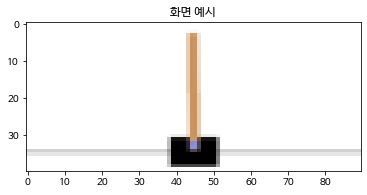

In [ ]:
#!pip install pyglet
# !pip install gym[classic_control]
import pyglet

resize = T.Compose([T.ToPILImage(),
                    T.Resize(40, interpolation=Image.CUBIC),
                    T.ToTensor()]) # image resize & to tensor

def get_cart_location(screen_width): # cart의 위치 정보 가져오는 함수
    world_width = env.x_threshold * 2
    scale = screen_width / world_width
    return int(env.state[0] * scale + screen_width / 2.0) # cart의 중간(중앙) 위치

def get_screen():
  # 엡실론 욕심쟁이 정책(epsilon greedy plicy)에 따라 행동을 선택하는데 활용과 탐험을 이용해 행동이 선택된다
  # 때로는 모델을 활용하게 되고 때로는 리플레이 메모리 데이터를 랜덤하게 샘플링해 탐험을 함
  # 랜덤 샘플링을 선택할 확률은  EPS_START에서 시작해 EPS_END를 향해 기하급수적으로 감소, EPS_DECAY는 감소 비율
    screen = env.render(mode='rgb_array').transpose((2, 0, 1)) # gym을 이용한 출력은 400x600x3의 형태를 갖지만 때로는 800x1200x3의 형태를 갖기도 함
    _, screen_height, screen_width = screen.shape
    screen = screen[:, int(screen_height*0.4):int(screen_height * 0.8)]
    view_width = int(screen_width * 0.6)
    cart_location = get_cart_location(screen_width)
    
    if cart_location < view_width // 2: # 카트는 출력 화면의 아래쪽 중앙에 존재하므로 화면의 위쪽과 아래쪽을 제거
        slice_range = slice(view_width) # slice는 데이터 중 일부를 잘라서 가져올 때 사용함함
    elif cart_location > (screen_width - view_width // 2):
        slice_range = slice(-view_width, None)
    else:
        slice_range = slice(cart_location - view_width // 2,
                            cart_location + view_width // 2)
    screen = screen[:, :, slice_range]
    screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
    screen = torch.from_numpy(screen)
    return resize(screen).unsqueeze(0).to(device) # 출력 크기 조정 및 배치 차원 추가

env.reset() # 환경 초기화
plt.figure()
plt.imshow(get_screen().cpu().squeeze(0).permute(1, 2, 0).numpy(),
           interpolation='none') # permute function은 transpose 함수처럼 차원을 바꾸어서 표현할 때 사용
plt.title('화면 예시')
plt.show()

In [ ]:
BATCH_SIZE = 128
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
TARGET_UPDATE = 10
init_screen = get_screen()
_, _, screen_height, screen_width = init_screen.shape
n_actions = env.action_space.n # gym에서 행동(action)에 대한 횟수를 가져옴

policy_net = DQN(screen_height, screen_width, n_actions).to(device)
target_net = DQN(screen_height, screen_width, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict()) # policy.net model을 불러와서 파라미터 값을 채움
target_net.eval()

optimizer = optim.RMSprop(policy_net.parameters())
memory = ReplayMemory(10000)

steps_done = 0

def select_action(state):
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1
    if sample > eps_threshold:
        with torch.no_grad():
            return policy_net(state).max(1)[1].view(1, 1) # max(1)은 각 행의 가장 큰 열 값을 반환
    else:
        return torch.tensor([[random.randrange(n_actions)]], device=device, dtype=torch.long)

episode_durations = []

In [ ]:
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    
    transitions = memory.sample(BATCH_SIZE)
    batch = Transition(*zip(*transitions))
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    # 게임의 상태(종료가 아닌 모든 상태)를 계산하기 위한 코드드
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None]) # torch.cat을 이용해 s 값들을 이어 붙임
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    state_action_values = policy_net(state_batch).gather(1, action_batch)
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()
    # 발생 가능한 다음 상태(V(s_(t+1)))를 계산하기 위한 코드
    # 다음 상태에서 발생할 행동의 기댓값 계산은 target_net에서 진행
    # 다음 상태의 행동은 보상이 최대가 되는 것을 선택

    expected_state_action_values = (next_state_values * GAMMA) + reward_batch # V(s_(i+1))을 계산

    loss = F.smooth_l1_loss(state_action_values, expected_state_action_values.unsqueeze(1)) # 오차를 계산하기 위해 smooth_l1_loss를 사용
    # smooth_l1_loss는 tensor에서 요소별 오차의 절댓값이 beta 미만이면 L2 loss, 그 외의 경우 L1 loss를 사용하는 방식
    optimizer.zero_grad()
    loss.backward()
    
    for param in policy_net.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()

In [ ]:
num_episodes = 50

for i_episode in range(num_episodes):
    env.reset()
    last_screen = get_screen()
    current_screen = get_screen()
    state = current_screen - last_screen
    
    for t in count():
        action = select_action(state)
        # print(env.step(action.item()))
        _, reward, done, _, _ = env.step(action.item())
        # _, reward, done, _ = env.step(action.item())
        reward = torch.tensor([reward], device=device)

        last_screen = current_screen
        current_screen = get_screen()
        
        if not done:
            next_state = current_screen - last_screen
        else:
            next_state = None

        memory.push(state, action, next_state, reward)
        state = next_state

        optimize_model()
        if done:
            episode_durations.append(t + 1)
            break

    if i_episode % TARGET_UPDATE == 0:
        target_net.load_state_dict(policy_net.state_dict())

print('종료')
env.render()
env.close()
plt.show()

## 12.5 몬테카를로 트리 탐색
- 몬테카를로 트리 탐색은 알파고에서 사용된 알고리즘으로 유명
- 바둑처럼 다양한 경우의 수를 고려해야 할 때 주로 사용
- 모든 트리 노드를 대상으로 탐색하는 대신 게임 시뮬레이션을 이용해 가장 가능성이 높아 보이는 방향으로 행동을 결정하는 탐색 방법
- 경우의 수가 많을 때 순차적으로 시도하는 것이 아닌 무작위 방법 중 가장 승률이 높은 값을 기반으로 시도하는 것
- 최선의 선택을 하기 위한 방법으로 트리에서 랜덤 시뮬레이션을 이용하여 최적의 선택을 결정